# **Linearity of protein presence vs sample concentration**
> ## This code takes high-throughput immunoassay data and assesses the linearity of the presence of a target oncogenic protein for different lysate concentrations.

## **Importing Jess Data**

In [9]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


df = pd.read_csv(r"C:\Users\ryanr\OneDrive\Desktop\Cogent\Oncoprotein_Jess_Data.csv")
df

,Sample,Concentration,Capillary,control_area,oncoprotein_area,control_height,oncoprotein_height
0,"1,1",1.28,2,1238320.7,877290.9,213842.5,70407.2
1,"1,1",1.00,3,927529.7,767122.4,157697.9,66652.8
2,"1,1",0.50,4,129733.7,350011.5,21245.9,33078.6
3,"1,1",0.10,5,2095.2,55086.6,218.6,6106.1
4,"1,2",2.29,6,6010560.7,1489917.5,792510.7,91531.4
5,"1,2",1.00,7,2388445.6,993981.1,391526.3,81517.0
6,"1,2",0.50,8,417391.8,616205.6,75316.6,64777.8
7,"1,2",0.10,9,11097.5,122803.5,1836.6,12421.2
8,"1,3",1.85,10,5368986.2,1197708.7,759895.9,85382.8
9,"1,3",1.00,11,1965249.1,923201.1,326212.6,81009.2


## **Separating dataframe into Samples 1-1, 1-2, and 1-3**

In [10]:
# Sample 1-1
df_1_1 = df.iloc[:4,:]
display(df_1_1)

#Sample 1-2
df_1_2 = df.iloc[4:8,:]
display(df_1_2)

#Sample 1-3
df_1_3 = df.iloc[8:12,:]
display(df_1_3)

,Sample,Concentration,Capillary,control_area,oncoprotein_area,control_height,oncoprotein_height
0,"1,1",1.28,2,1238320.7,877290.9,213842.5,70407.2
1,"1,1",1.00,3,927529.7,767122.4,157697.9,66652.8
2,"1,1",0.50,4,129733.7,350011.5,21245.9,33078.6
3,"1,1",0.10,5,2095.2,55086.6,218.6,6106.1


,Sample,Concentration,Capillary,control_area,oncoprotein_area,control_height,oncoprotein_height
4,"1,2",2.29,6,6010560.7,1489917.5,792510.7,91531.4
5,"1,2",1.00,7,2388445.6,993981.1,391526.3,81517.0
6,"1,2",0.50,8,417391.8,616205.6,75316.6,64777.8
7,"1,2",0.10,9,11097.5,122803.5,1836.6,12421.2


,Sample,Concentration,Capillary,control_area,oncoprotein_area,control_height,oncoprotein_height
8,"1,3",1.85,10,5368986.2,1197708.7,759895.9,85382.8
9,"1,3",1.00,11,1965249.1,923201.1,326212.6,81009.2
10,"1,3",0.50,12,375198.6,577473.1,64011.3,57332.5
11,"1,3",0.10,13,4298.6,117411.2,665.0,12348.9


## Creating x and y data from sample dataframes

In [11]:
# Oncoprotein
# Sample 1-1
x1 = df_1_1.Concentration
y1 = df_1_1.oncoprotein_area
# Sample 1-2
x2 = df_1_2.Concentration
y2 = df_1_2.oncoprotein_area
# Sample 1-3
x3 = df_1_3.Concentration
y3 = df_1_3.oncoprotein_area

# Control
# Sample 1-1
x4 = df_1_1.Concentration
y4 = df_1_1.control_area
# Sample 1-2
x5 = df_1_2.Concentration
y5 = df_1_2.control_area
# Sample 1-3
x6 = df_1_3.Concentration
y6 = df_1_3.control_area

## Displaying x/y data

In [12]:
from IPython.display import display

dataframes = [df_1_1, df_1_2, df_1_3]

# Display x/y data
def display_sample_data(df, x_label, y_label_onc, y_label_gap):
    # x
    concentration = df.Concentration
    # y (oncoprotein)
    oncoprotein_area = df.oncoprotein_area
    # y (control)
    control_area = df.control_area

    # Create a DataFrame with column names
    data = {
        f'{x_label} (Concentration)': concentration,
        f'{y_label_onc} (Oncoprotein area)': oncoprotein_area,
        f'{y_label_gap} (Control area)': control_area
    }
    
    sample_df = pd.DataFrame(data)
    # print(f"\n{sample_name}-{idx} Data:\n")
    display(sample_df)

# Display data for each sample with proper headers
for idx, df in enumerate(dataframes, start=1):
    x_label = f'x{idx}'
    y_label_onc = f'y{idx}'
    y_label_gap = f'y{idx+3}'
    display_sample_data(df, x_label, y_label_onc, y_label_gap)

,x1 (Concentration),y1 (Oncoprotein area),y4 (Control area)
0,1.28,877290.9,1238320.7
1,1.00,767122.4,927529.7
2,0.50,350011.5,129733.7
3,0.10,55086.6,2095.2


,x2 (Concentration),y2 (Oncoprotein area),y5 (Control area)
4,2.29,1489917.5,6010560.7
5,1.00,993981.1,2388445.6
6,0.50,616205.6,417391.8
7,0.10,122803.5,11097.5


,x3 (Concentration),y3 (Oncoprotein area),y6 (Control area)
8,1.85,1197708.7,5368986.2
9,1.00,923201.1,1965249.1
10,0.50,577473.1,375198.6
11,0.10,117411.2,4298.6


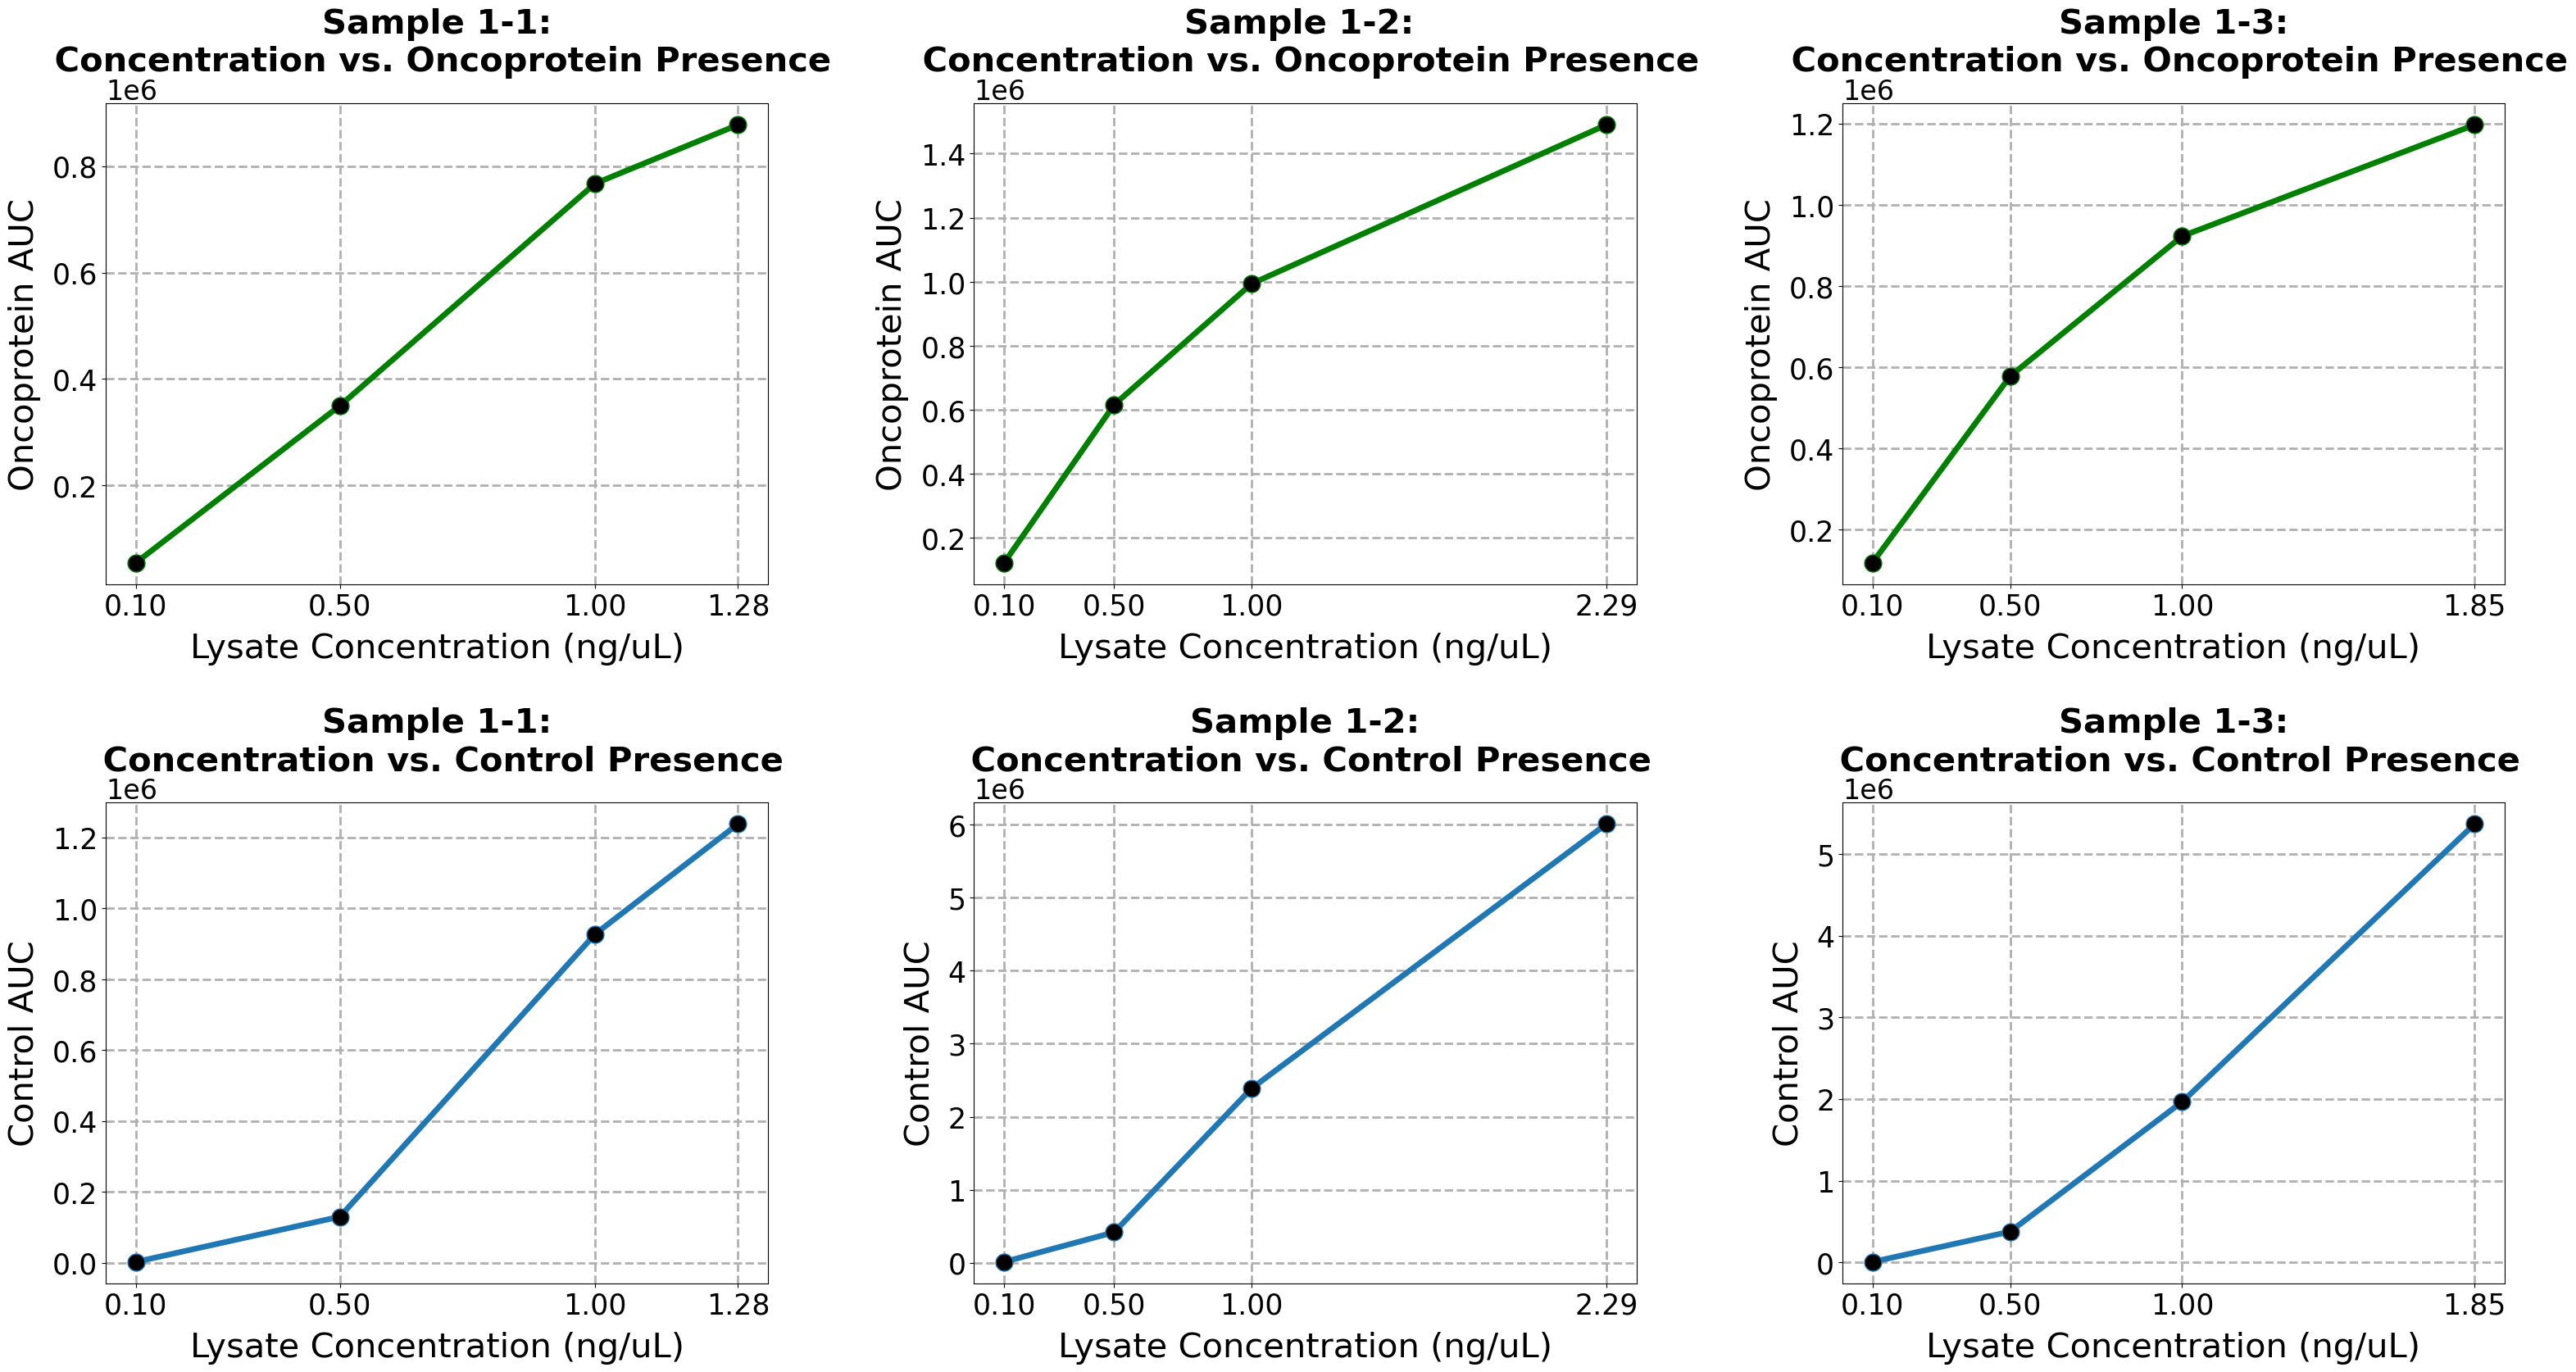

In [13]:
import matplotlib.pyplot as plt


# Initializing subplot layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
fig.tight_layout(w_pad=15, h_pad=17)

# Function for plotting the data
    # Takes arguments of each dataset that are prone to change
    # Loops through aggregated tuples containing argument data
def plot_subplots(ax, x, y, title, ylabel, color):
    # Plot
    ax.plot(x, y, color=color, linewidth=5, marker='o', markersize=15, markerfacecolor='black')
    
    # Title
    ax.set_title(title, fontweight="bold", fontsize=30)
    # x-axis label
    ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=30, labelpad=10)
    # y-axis label
    ax.set_ylabel(ylabel, fontsize=30, labelpad=10)
    
    # Scientific notation (y-axis)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
    # Font size for "1e6"
    ax.yaxis.offsetText.set_fontsize(24)
    
    # Tick font size
    ax.tick_params(labelsize=25)
    
    # Label only the 4 concentrations used on the x-axis
    ax.set_xticks(x)
    
    # Grid
    ax.grid(linestyle='--', linewidth=2)

# Initializing tuples for dataset variables that are prone to change (subplot, x/y, y-label, title, color)
    # axes.flat iterates over all subplots regardless of their grid arrangement
    # zip() returns aggregated tuples of the i-th element of each iterable
data = [(ax, x, y, title, ylabel, color) for ax, x, y, title, ylabel, color in zip(
    # Iterables:
    
    # Subplots
    axes.flat,
    # x data
    [x1, x2, x3, x4, x5, x6],
    # y data
    [y1, y2, y3, y4, y5, y6],
    # Titles
    ["Sample 1-1:\n Concentration vs. Oncoprotein Presence", "Sample 1-2: \n Concentration vs. Oncoprotein Presence", 
         "Sample 1-3:\n Concentration vs. Oncoprotein Presence", "Sample 1-1:\n Concentration vs. Control Presence", 
         "Sample 1-2:\n Concentration vs. Control Presence", "Sample 1-3:\n Concentration vs. Control Presence"],
    # y labels
    ["Oncoprotein AUC", "Oncoprotein AUC", "Oncoprotein AUC", "Control AUC", "Control AUC", "Control AUC"],
    # Colors
    ['green', 'green', 'green', 'tab:blue', 'tab:blue', 'tab:blue'])]
# We now have a list of 6 tuples corresponding to each subplot
    
# For each tuple element in data:
for ax, x, y, title, ylabel, color in data:
    plot_subplots(ax, x, y, title, ylabel, color)

## Visualizing the same data differently:

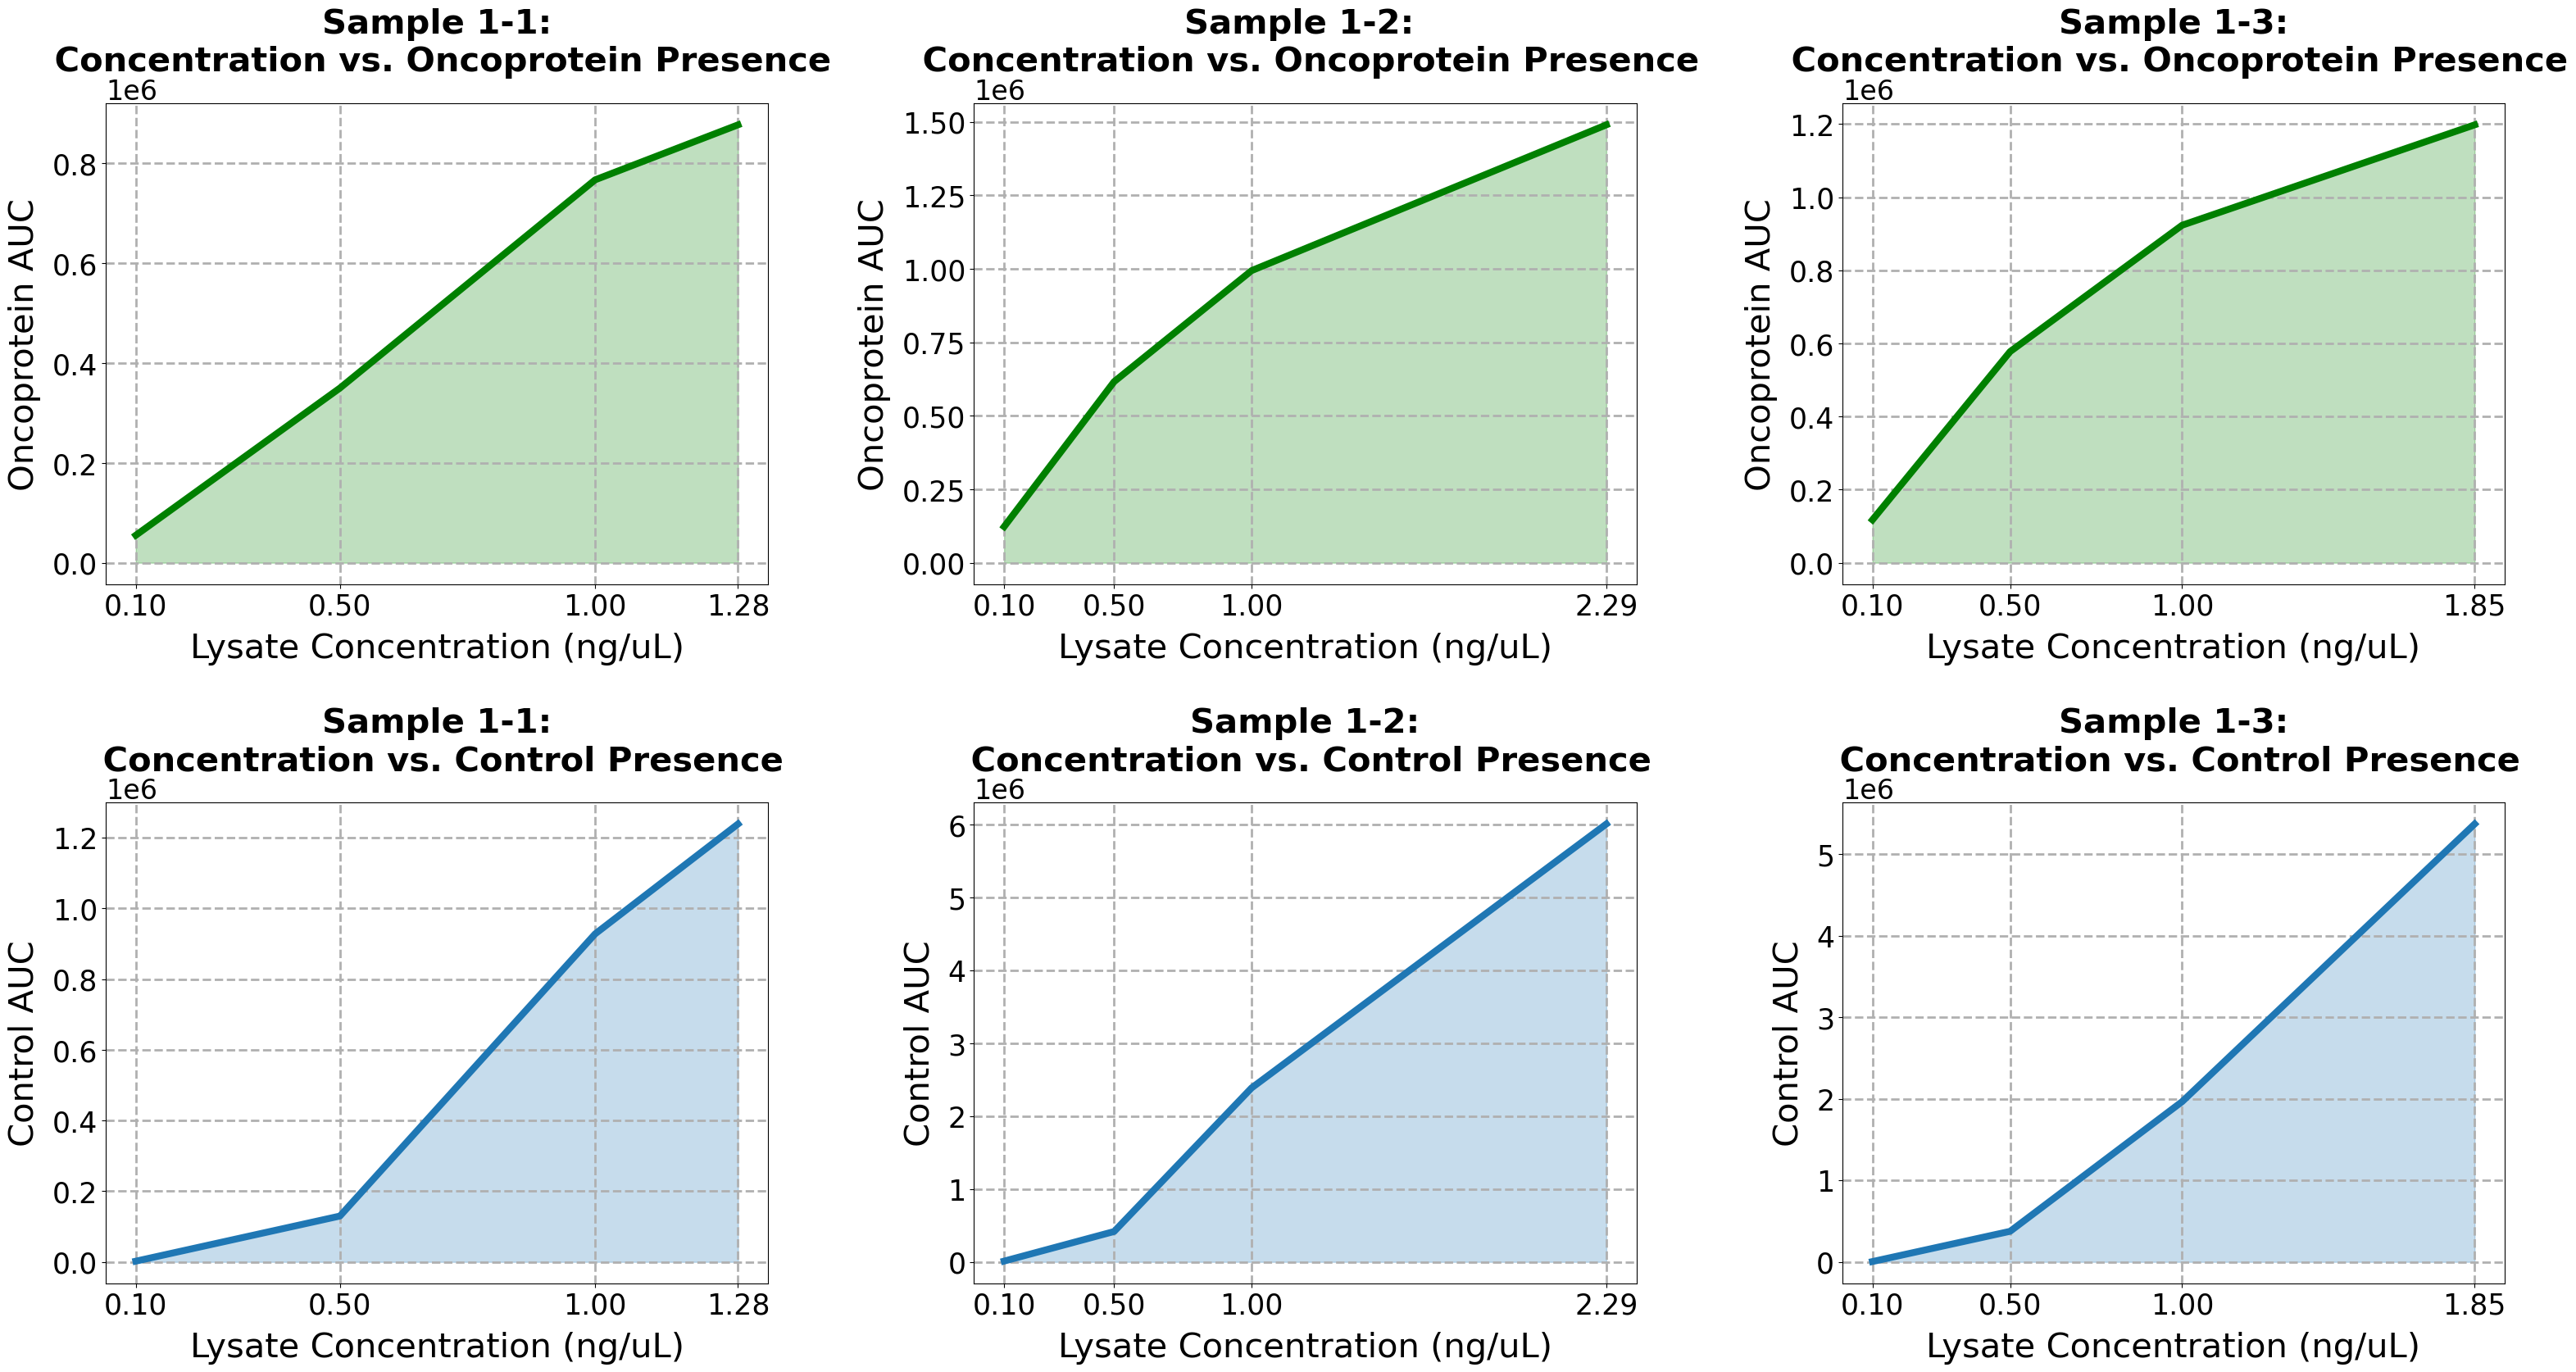

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
fig.tight_layout(w_pad=15, h_pad=17)

def plot_subplots(ax, x, y, title, ylabel, color):
    # Get rid of scatter plot markers
    ax.plot(x, y, color=color, linewidth=6, marker='none')
    # Title
    ax.set_title(title, fontweight="bold", fontsize=30)
    # x-axis label
    ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=30, labelpad=10)
    # y-axis label
    ax.set_ylabel(ylabel, fontsize=30, labelpad=10)
    # Scientific notation (y-axis)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
    # Font size for "1e6"
    ax.yaxis.offsetText.set_fontsize(24)
    # Tick font size
    ax.tick_params(labelsize=25)
    # Label only the 4 concentrations used on the x-axis
    ax.set_xticks(x)
    # Grid
    ax.grid(linestyle='--', linewidth=2)
    # Color the AUC
    ax.fill_between(x, y, alpha=0.25, color=color)
    
data = [(ax, x, y, title, ylabel, color) for ax, x, y, title, ylabel, color in zip(
        # Iterables:
        # Subplots
        axes.flat,
        # x data
        [x1, x2, x3, x4, x5, x6],
        # y data
        [y1, y2, y3, y4, y5, y6],
        # Titles
        ["Sample 1-1:\n Concentration vs. Oncoprotein Presence", "Sample 1-2: \n Concentration vs. Oncoprotein Presence", 
         "Sample 1-3:\n Concentration vs. Oncoprotein Presence", "Sample 1-1:\n Concentration vs. Control Presence", 
         "Sample 1-2:\n Concentration vs. Control Presence", "Sample 1-3:\n Concentration vs. Control Presence"],
        # y labels
        ["Oncoprotein AUC", "Oncoprotein AUC", "Oncoprotein AUC", "Control AUC", "Control AUC", "Control AUC"],
        # Colors
        ['green', 'green', 'green', 'tab:blue', 'tab:blue', 'tab:blue'])]

# For each tuple element in data:
for ax, x, y, title, ylabel, color in data:
    plot_subplots(ax, x, y, title, ylabel, color)

# **Analyzing the linearity of different concentration ranges (regions):**
> ## 1. Split data into regions
> ## 2. Fit a Linear Regression model to each region, and score each region
>> ### $R^{2}$ measures how well the data fits a linear regression model
> ## 3. Plot each region with its $R^2$ value

## 1. Splitting data into regions:
> ### Example highlighting different regions

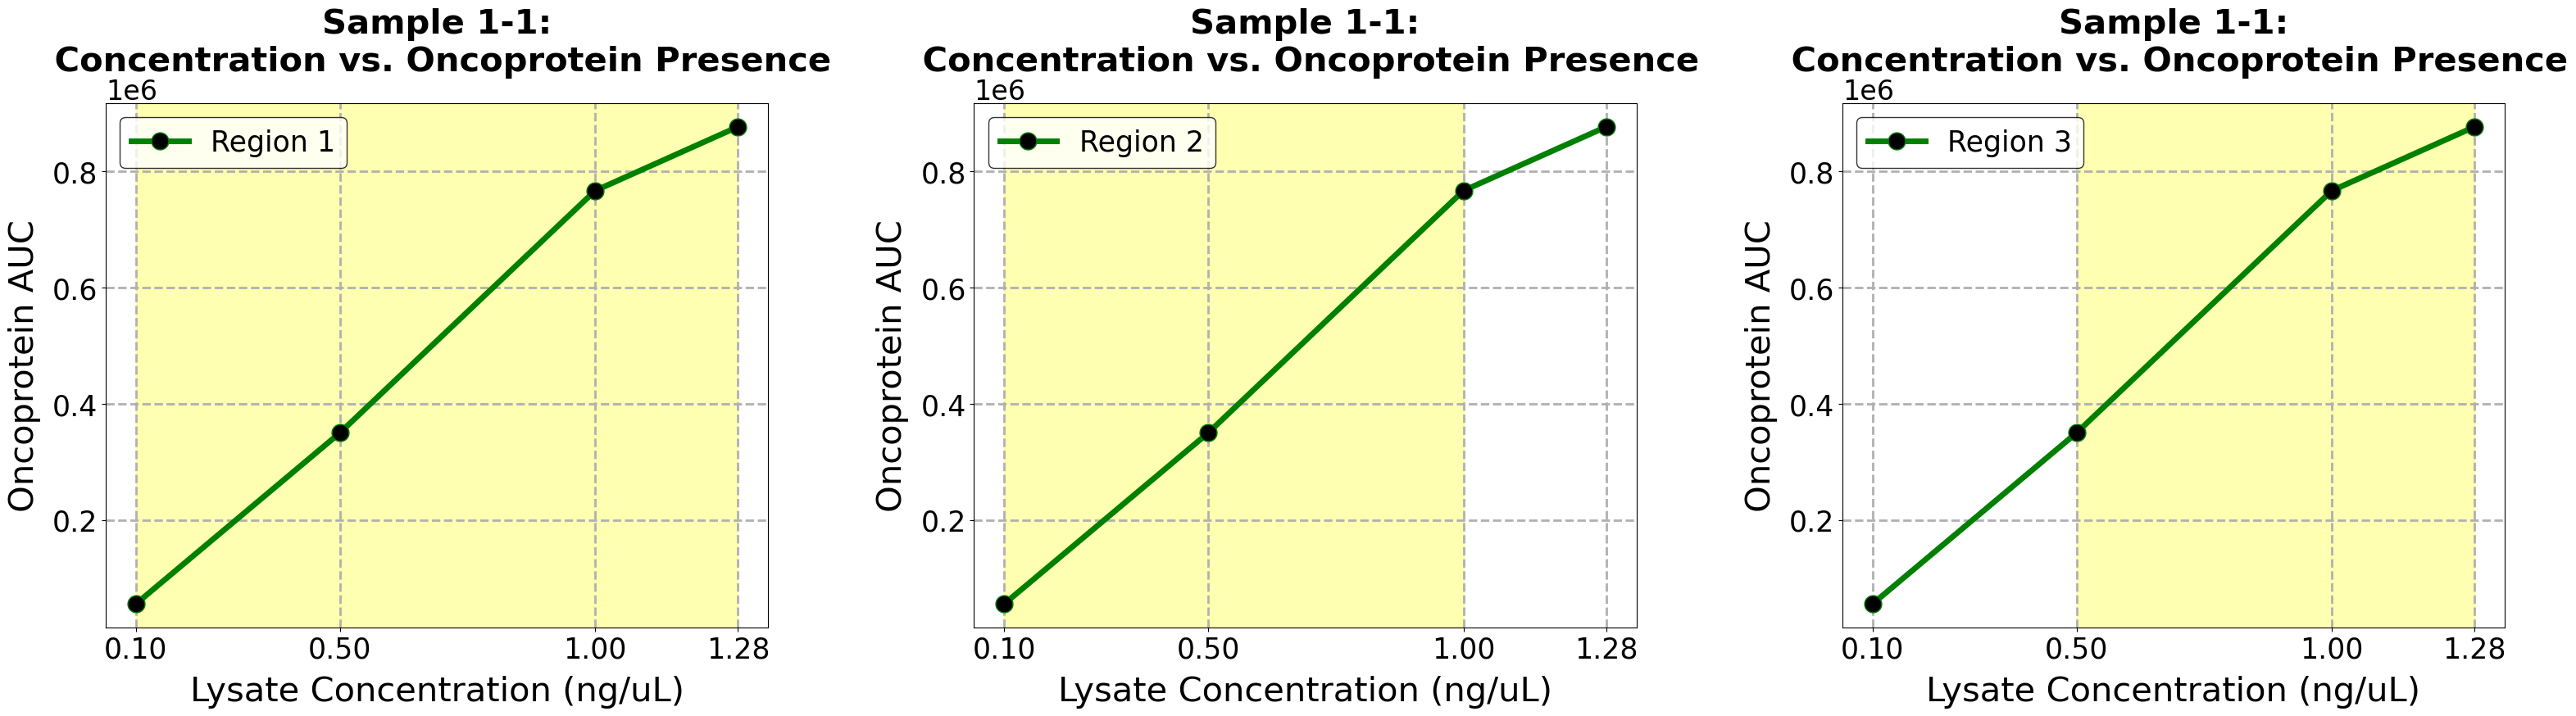

In [15]:
# Initializing x/y data for Sample 1-1
x = x1
y = y1
# Maximum x-axis data point
Max = x1[0]
# 3 distinct regions
regions = [(0.1, Max), (0.1, 1.0), (0.5, Max)]
# Legend depicting regions
legend = ['Region 1', 'Region 2', 'Region 3']

fig, axes = plt.subplots(1, 3, figsize=(30, 7))
fig.tight_layout(w_pad=15)

def plot_subplots(ax, x_region, legend):
    ax.plot(x, y, color='green', linewidth=5, marker='o', markersize=15, markerfacecolor='black', label=legend)
    # Legend location and font size
    legend = ax.legend(loc='upper left', fontsize=25)
    # Legend border & border color
    legend.get_frame().set_edgecolor('black')
    # Legend border width
    legend.get_frame().set_linewidth(1)
    # Title
    ax.set_title('Sample 1-1:\n Concentration vs. Oncoprotein Presence', fontweight="bold", fontsize=30)
    # x-axis label
    ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=30, labelpad=10)
    # y-axis label
    ax.set_ylabel('Oncoprotein AUC', fontsize=30, labelpad=10)
    # Scientific Notation (y-axis)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
    # Font size for "1e6"
    ax.yaxis.offsetText.set_fontsize(24)
    # Sets font size of ticks
    ax.tick_params(labelsize=25)
    # Label only the 4 concentrations used on the x-axis
    ax.set_xticks(x)
    # Grid
    ax.grid(linestyle='--', linewidth=2)
    # Highlighting the region of interest
    ax.axvspan(x_region[0], x_region[1], color='yellow', alpha=0.3)

data = [(ax, region, legend) for ax, region, legend in zip(
    axes.flat, regions, legend)]

# For each tuple element in data:
for ax, region, legend in data:
    plot_subplots(ax, region, legend)

## 2. Calculating $R^2$ for each region across all 3 samples:

In [16]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


# Reshaping all of the data and defining regions
# Oncoprotein sample 1-1
Max1 = x1[0]
# Region 1-1
x_1_1 = np.array(df_1_1.Concentration).reshape((-1, 1))
y_1_1 = np.array(df_1_1.oncoprotein_area)
# Region 1-2
x_1_2 = np.array(df_1_1.iloc[1:,:].Concentration).reshape((-1, 1))
y_1_2 = np.array(df_1_1.iloc[1:,:].oncoprotein_area)
# Region 1-3
x_1_3 = np.array(df_1_1.iloc[:3,:].Concentration).reshape((-1, 1))
y_1_3 = np.array(df_1_1.iloc[:3,:].oncoprotein_area)
# Oncoprotein sample 1-2
Max2 = x2[4]
# Region 2-1
x_2_1 = np.array(df_1_2.Concentration).reshape((-1, 1))
y_2_1 = np.array(df_1_2.oncoprotein_area)
# Region 2-2
x_2_2 = np.array(df_1_2.iloc[1:,:].Concentration).reshape((-1, 1))
y_2_2 = np.array(df_1_2.iloc[1:,:].oncoprotein_area)
# Region 2-3
x_2_3 = np.array(df_1_2.iloc[:3,:].Concentration).reshape((-1, 1))
y_2_3 = np.array(df_1_2.iloc[:3,:].oncoprotein_area)
# Oncoprotein sample 1-3
Max3 = x3[8]
# Region 3-1
x_3_1 = np.array(df_1_3.Concentration).reshape((-1, 1))
y_3_1 = np.array(df_1_3.oncoprotein_area)
# Region 3-2
x_3_2 = np.array(df_1_3.iloc[1:,:].Concentration).reshape((-1, 1))
y_3_2 = np.array(df_1_3.iloc[1:,:].oncoprotein_area)
# Region 3-3
x_3_3 = np.array(df_1_3.iloc[:3,:].Concentration).reshape((-1, 1))
y_3_3 = np.array(df_1_3.iloc[:3,:].oncoprotein_area)


# Calculating R^2

# Initializing dictionary of R^2 values
R2_values = {}
# This function loops through all re-shaped x/y data regions and calculates R^2
for i in range(1, 4):
    for j in range(1, 4):
        # Keys
        region = f"Region_{i}_{j}"
        # Fit linear regression model to region
        model = LinearRegression().fit(eval(f"x_{i}_{j}"), eval(f"y_{i}_{j}"))
        # Score the data against the model to obtain R^2
        R2 = model.score(eval(f"x_{i}_{j}"), eval(f"y_{i}_{j}"))
        # Store R^2 value in the dictionary, formatted to three decimal places as a string
        R2_values[region] = f"{R2:.3f}"
print(R2_values)

{'Region_1_1': '0.990', 'Region_1_2': '0.999', 'Region_1_3': '0.974', 'Region_2_1': '0.926', 'Region_2_2': '0.980', 'Region_2_3': '0.971', 'Region_3_1': '0.918', 'Region_3_2': '0.979', 'Region_3_3': '0.955'}


## 3. Plotting each sample, region, and $R^2$ value:

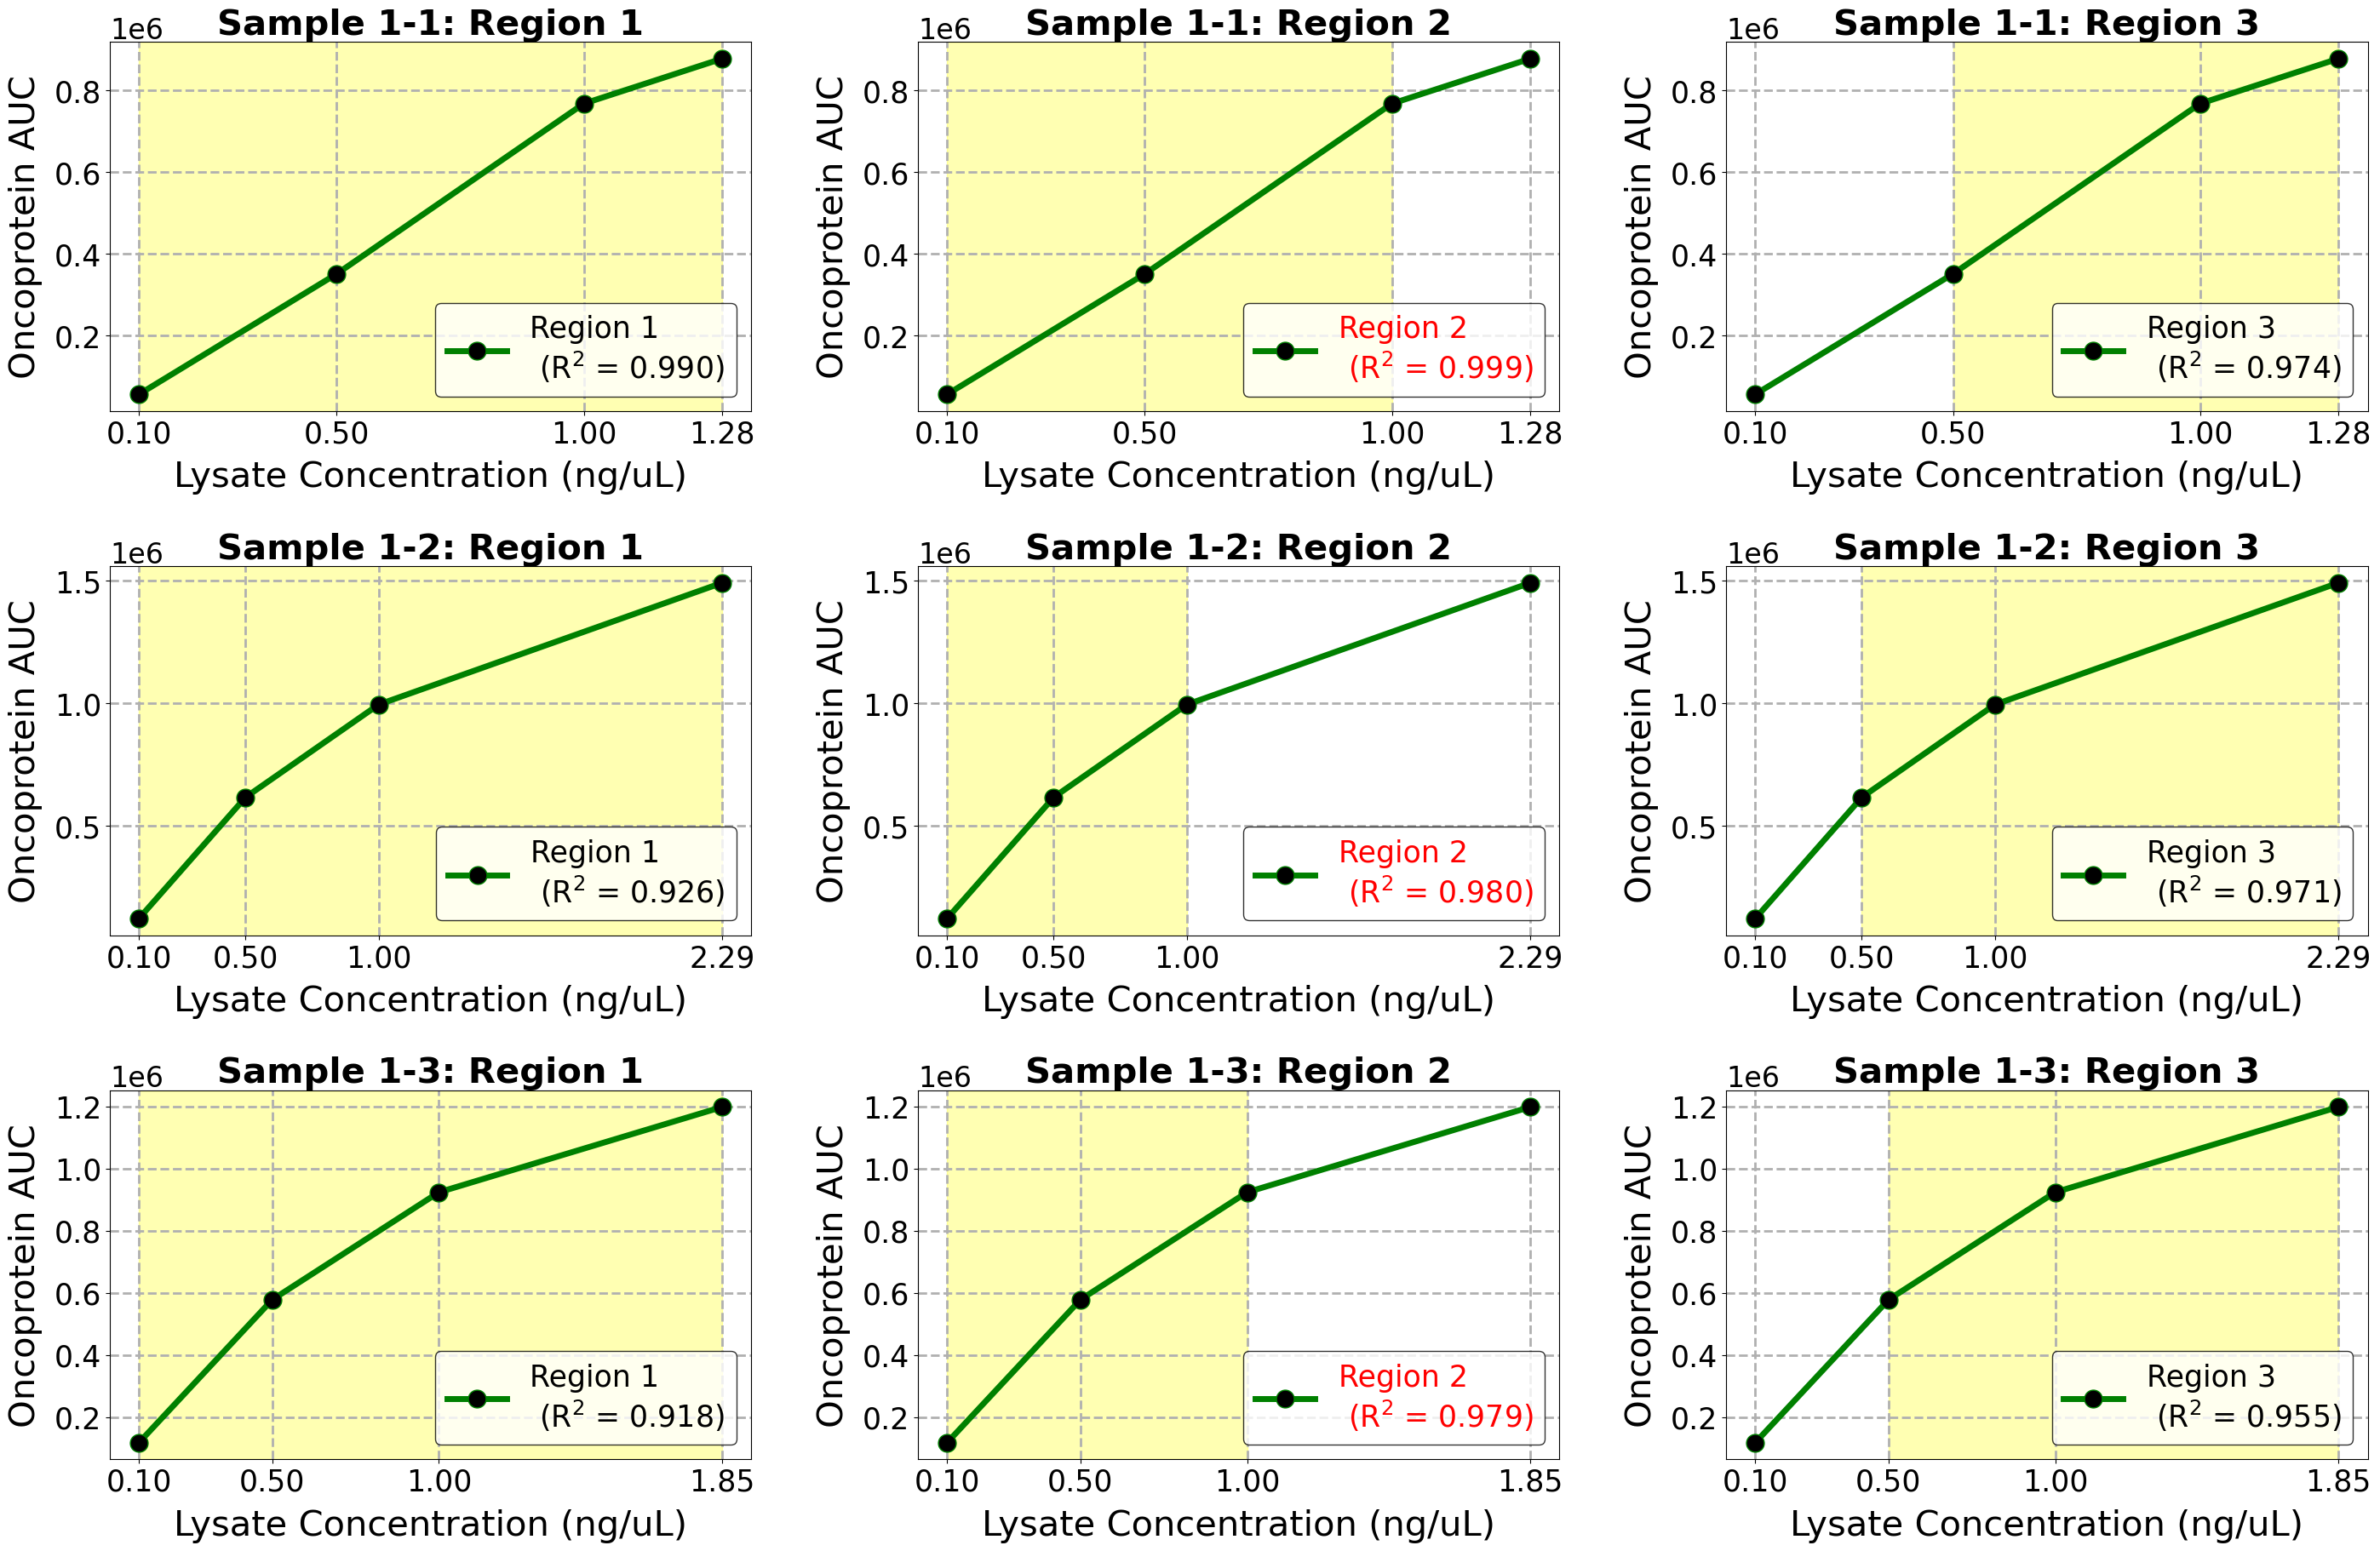

In [17]:
import itertools

# Convert R2_values to float for max R2 calculation
R2_values_float = {k: float(v) for k, v in R2_values.items()}

# Calculate max R2 values for each row
max_R2s = {
    'Row_1': max(R2_values_float['Region_1_1'], R2_values_float['Region_1_2'], R2_values_float['Region_1_3']),
    'Row_2': max(R2_values_float['Region_2_1'], R2_values_float['Region_2_2'], R2_values_float['Region_2_3']),
    'Row_3': max(R2_values_float['Region_3_1'], R2_values_float['Region_3_2'], R2_values_float['Region_3_3'])
}

# Plotting code
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
fig.tight_layout(pad=11)

# Titles for the subplots
titles = ['Sample 1-1: Region 1', 'Sample 1-1: Region 2', 'Sample 1-1: Region 3',
          'Sample 1-2: Region 1', 'Sample 1-2: Region 2', 'Sample 1-2: Region 3',
          'Sample 1-3: Region 1', 'Sample 1-3: Region 2', 'Sample 1-3: Region 3']

# Regions for the x-axis
regions = [(0.1, Max1), (0.1, 1.0), (0.5, Max1), 
           (0.1, Max2), (0.1, 1.0), (0.5, Max2), 
           (0.1, Max3), (0.1, 1.0), (0.5, Max3)]

# Legend labels
legend_labels = ['Region 1', 'Region 2', 'Region 3',
                 'Region 1', 'Region 2', 'Region 3',
                 'Region 1', 'Region 2', 'Region 3']

# x_data and y_data
x_data = [x1, x1, x1, x2, x2, x2, x3, x3, x3]
y_data = [y1, y1, y1, y2, y2, y2, y3, y3, y3]

# This function plots datasets 1-1, 1-2, and 1-3 with 3 distinct x-regions each, and displays
# the R^2 value for each region
def plot_subplots(ax, x, y, title, x_region, legend, R2, max_R2):
    ax.plot(x, y, color='green', linewidth=5, marker='o', markersize=15, markerfacecolor='black', label=legend + "\n (R$^2$ = " + R2 + ")")
    # Legend location and font size
    legend_obj = ax.legend(loc='lower right', fontsize=25)
    # Legend border & border color
    legend_obj.get_frame().set_edgecolor('black')
    # Legend border width
    legend_obj.get_frame().set_linewidth(1)
    # Title
    ax.set_title(title, fontweight="bold", fontsize=30)
    # x-axis label
    ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=30, labelpad=10)  # labelpad sets distance of axis label from tick labels
    # y-axis label
    ax.set_ylabel('Oncoprotein AUC', fontsize=30, labelpad=10)
    # Scientific Notation (y-axis)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(6, 6))
    # Font size for "1e6"
    ax.yaxis.offsetText.set_fontsize(24)
    # Sets font size of ticks
    ax.tick_params(labelsize=25)
    # Labels only the 4 concentrations used on the x-axis
    ax.set_xticks(x)
    # Grid
    ax.grid(linestyle='--', linewidth=2)
    # Range visualization (x-axis)
    ax.axvspan(x_region[0], x_region[1], color='yellow', alpha=0.3)

    # Highlight the legend text if this is the max R2
    for text in legend_obj.get_texts():
        r2_value_in_text = float(text.get_text().split('=')[-1].strip()[:-1])
        # print(f'Checking if {r2_value_in_text} == {max_R2}')  # Debug statement
        if 'R$^2$' in text.get_text() and r2_value_in_text == max_R2:
            text.set_color('red')

# Ensure correct R2 values are passed to the plot_subplots function
data = []
for (i, j), ax, x, y, title, region, legend in zip(itertools.product(range(1, 4), repeat=2), axes.flat, x_data, y_data, titles, regions, legend_labels):
    R2_key = f"Region_{i}_{j}"
    R2 = R2_values[R2_key]
    max_R2 = max_R2s[f"Row_{i}"]
    data.append((ax, x, y, title, region, legend, R2, max_R2))

# For each tuple element in data:
for ax, x, y, title, region, legend, R2, max_R2 in data:
    plot_subplots(ax, x, y, title, region, legend, R2, max_R2)

plt.show()

## Calculating $R^2$ for Control regions:

In [19]:
# Reshaping all of the data and defining regions

# Oncoprotein sample 1-1
Max1 = x1[0]
# Region 1-1
x_1_1 = np.array(df_1_1.Concentration).reshape((-1, 1))
y_1_1 = np.array(df_1_1.control_area)
# Region 1-2
x_1_2 = np.array(df_1_1.iloc[1:,:].Concentration).reshape((-1, 1))
y_1_2 = np.array(df_1_1.iloc[1:,:].control_area)
# Region 1-3
x_1_3 = np.array(df_1_1.iloc[:3,:].Concentration).reshape((-1, 1))
y_1_3 = np.array(df_1_1.iloc[:3,:].control_area)
# Oncoprotein sample 1-2
Max2 = x2[4]
# Region 2-1
x_2_1 = np.array(df_1_2.Concentration).reshape((-1, 1))
y_2_1 = np.array(df_1_2.control_area)
# Region 2-2
x_2_2 = np.array(df_1_2.iloc[1:,:].Concentration).reshape((-1, 1))
y_2_2 = np.array(df_1_2.iloc[1:,:].control_area)
# Region 2-3
x_2_3 = np.array(df_1_2.iloc[:3,:].Concentration).reshape((-1, 1))
y_2_3 = np.array(df_1_2.iloc[:3,:].control_area)
# Oncoprotein sample 1-3
Max3 = x3[8]
# Region 3-1
x_3_1 = np.array(df_1_3.Concentration).reshape((-1, 1))
y_3_1 = np.array(df_1_3.control_area)
# Region 3-2
x_3_2 = np.array(df_1_3.iloc[1:,:].Concentration).reshape((-1, 1))
y_3_2 = np.array(df_1_3.iloc[1:,:].control_area)
# Region 3-3
x_3_3 = np.array(df_1_3.iloc[:3,:].Concentration).reshape((-1, 1))
y_3_3 = np.array(df_1_3.iloc[:3,:].control_area)

# Calculating R^2

# Initializing dictionary of R^2 values
R2_values = {}
# This function loops through all re-shaped x/y data regions and calculates R^2
for i in range(1, 4):
    for j in range(1, 4):
        # Keys
        region = f"Region_{i}_{j}"
        # Fit linear regression model to region
        model = LinearRegression().fit(eval(f"x_{i}_{j}"), eval(f"y_{i}_{j}"))
        # Score the data against the model to obtain R^2
        R2 = model.score(eval(f"x_{i}_{j}"), eval(f"y_{i}_{j}"))
        # Store R^2 value in the dictionary
        R2_values[region] = R2
print(R2_values)

{'Region_1_1': 0.947625568815822, 'Region_1_2': 0.893802660617648, 'Region_1_3': 0.9924556068408706, 'Region_2_1': 0.9869672195348107, 'Region_2_2': 0.913179336700093, 'Region_2_3': 0.9935030190190232, 'Region_3_1': 0.9631539626879156, 'Region_3_2': 0.923329487091581, 'Region_3_3': 0.9966267820297406}


## Plotting samples, regions, and $R^2$ values for Control:

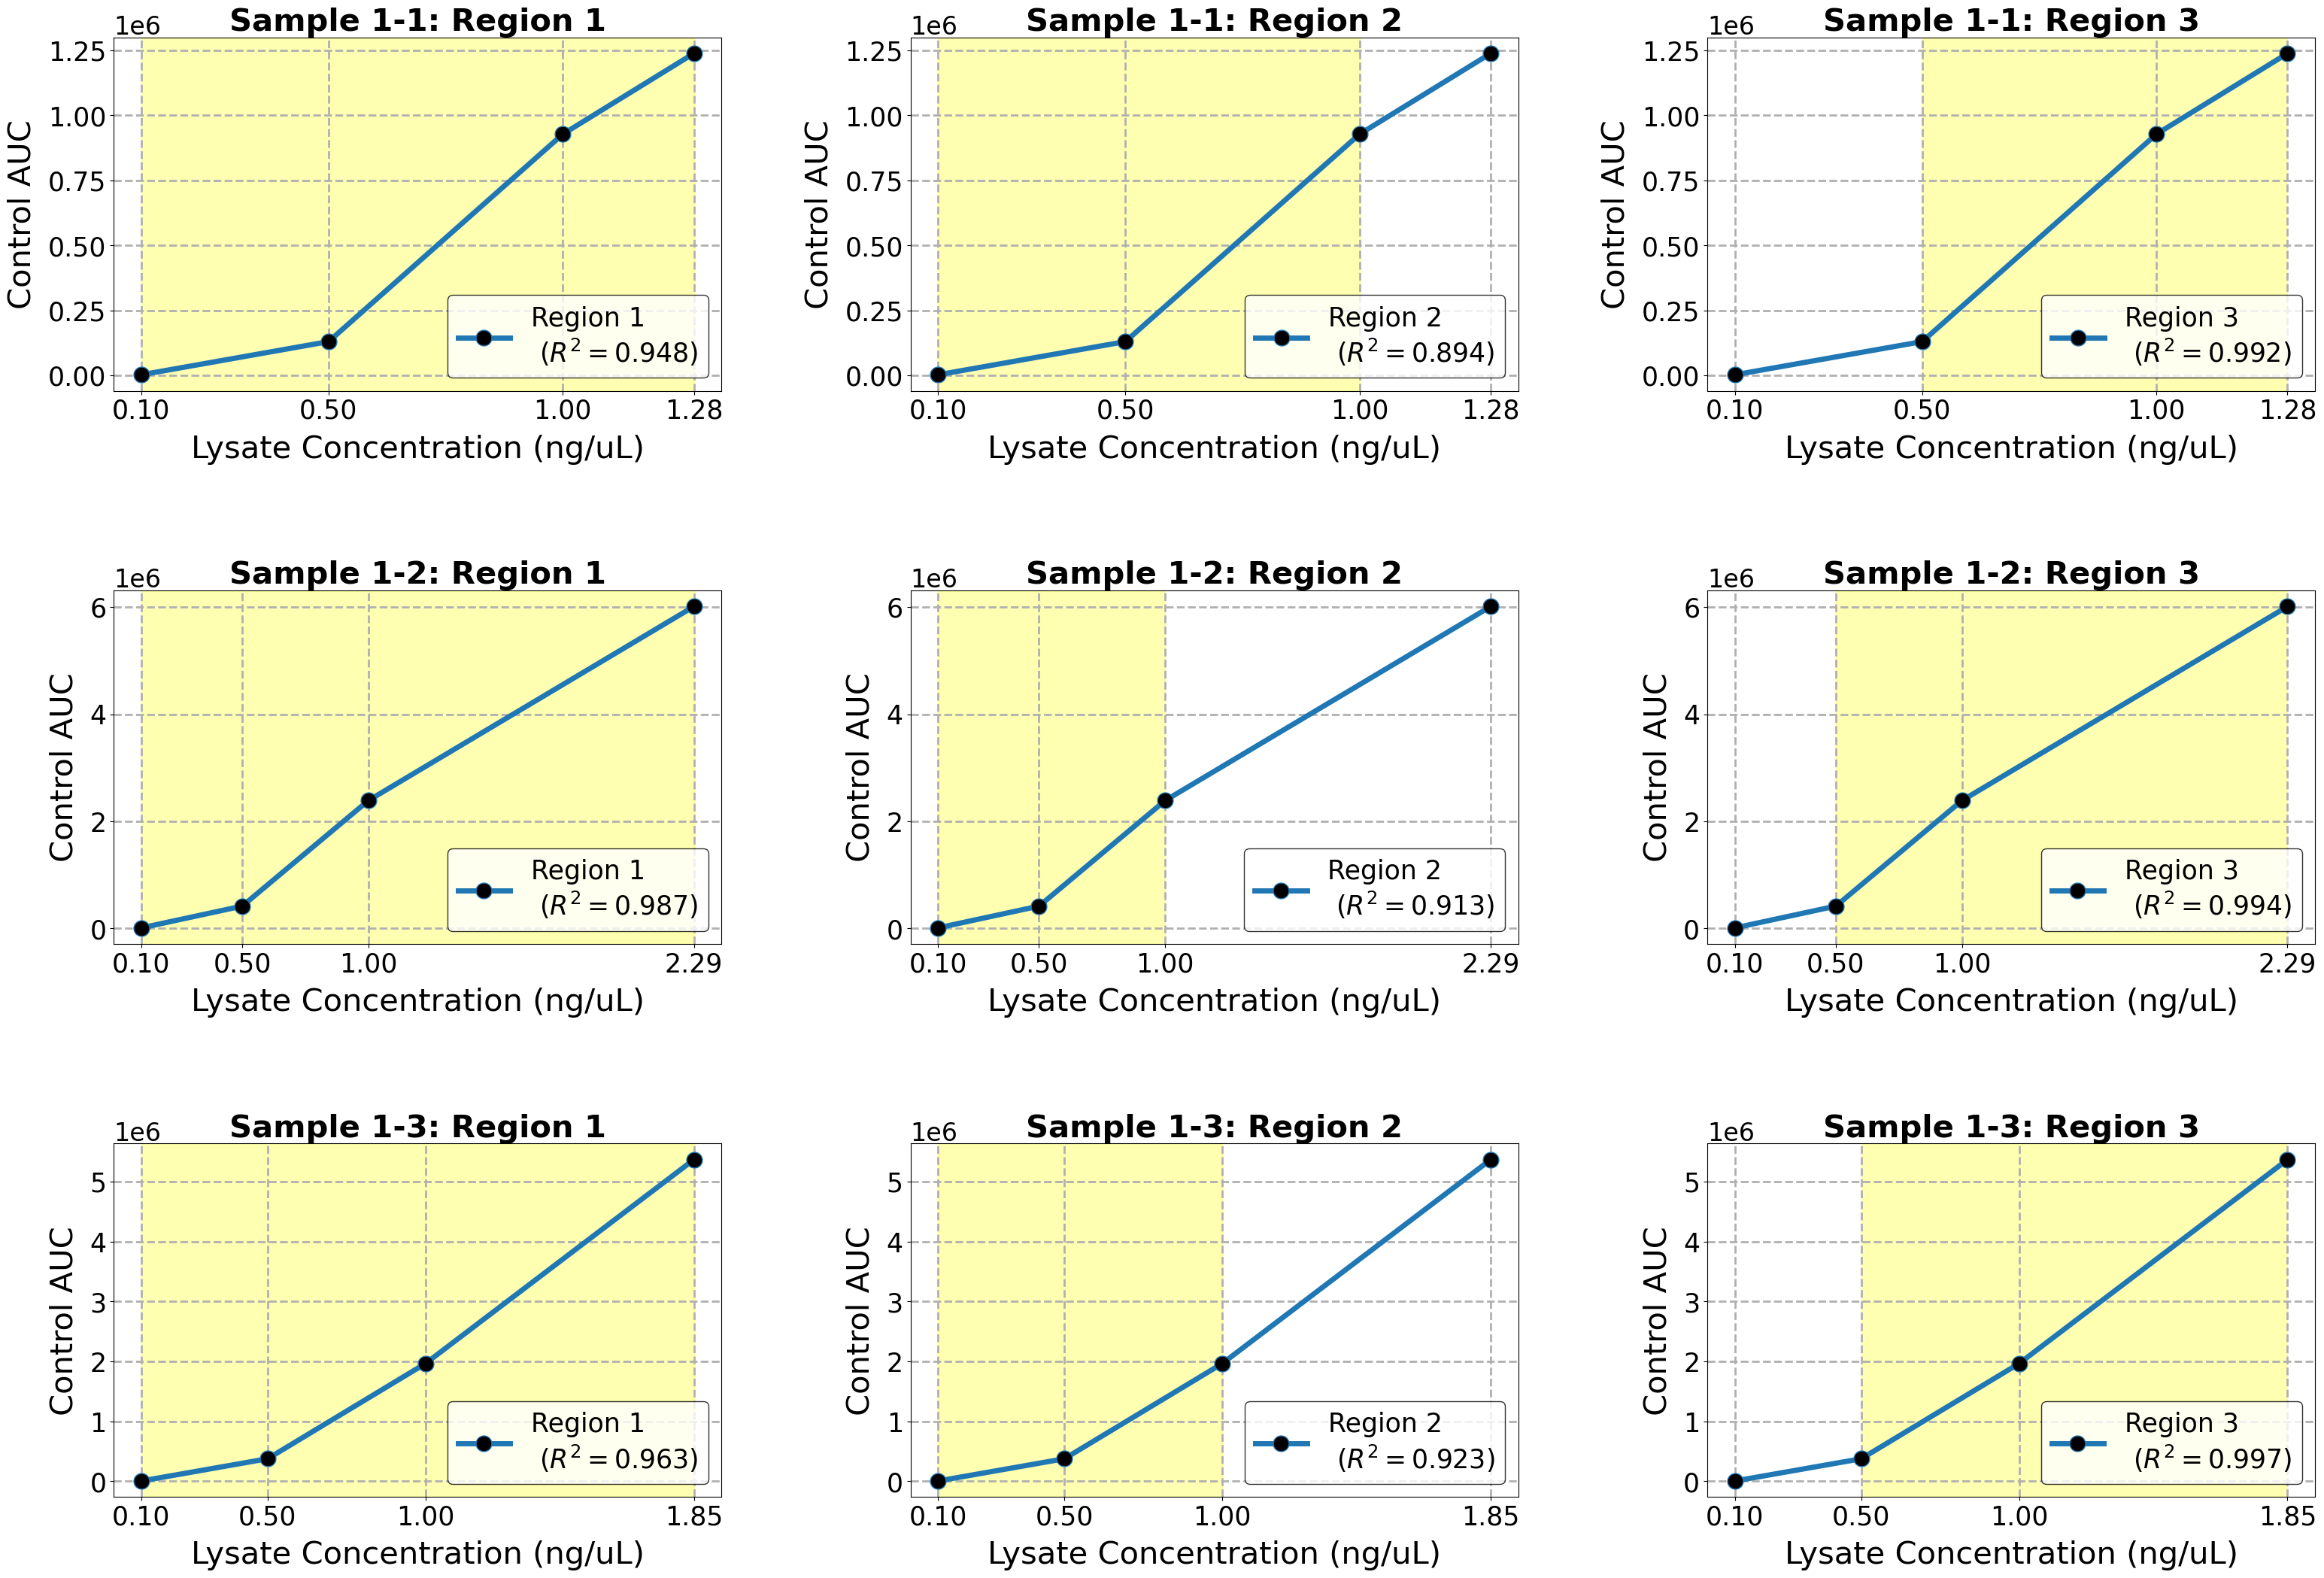

In [20]:
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import itertools

titles = ['Sample 1-1: Region 1', 'Sample 1-1: Region 2', 'Sample 1-1: Region 3',
         'Sample 1-2: Region 1', 'Sample 1-2: Region 2', 'Sample 1-2: Region 3', 
         'Sample 1-3: Region 1', 'Sample 1-3: Region 2', 'Sample 1-3: Region 3']

regions = [(0.1, Max1), (0.1, 1.0), (0.5, Max1), 
           (0.1, Max2), (0.1, 1.0), (0.5, Max2), 
           (0.1, Max3), (0.1, 1.0), (0.5, Max3)]

legend = ['Region 1', 'Region 2', 'Region 3', 
          'Region 1', 'Region 2', 'Region 3', 
          'Region 1', 'Region 2', 'Region 3']

x_data = [x4, x4, x4, x5, x5, x5, x6, x6, x6]
y_data = [y4, y4, y4, y5, y5, y5, y6, y6, y6]

fig, axes = plt.subplots(3, 3, figsize=(30, 20))
fig.tight_layout(w_pad=15, h_pad=17)

# This function plots datasets 1-1, 1-2, and 1-3 with 3 distinct x-regions each, and displays
# the R^2 value for each region
def plot_subplots(ax, x, y, title, x_region, legend, R2):
    ax.plot(x, y, color='tab:blue', linewidth=5, marker='o', markersize=15, markerfacecolor='black', label=f"{legend}\n ($R^2 = {R2:.3f}$)")
    # Legend location and font size
    legend = ax.legend(loc='lower right', fontsize=25)
    # Legend border & border color
    legend.get_frame().set_edgecolor('black')
    # Legend border width
    legend.get_frame().set_linewidth(1)
    # Title
    ax.set_title(title, fontweight="bold", fontsize=30)
    # x-axis label
    ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=30, labelpad=10) # labelpad sets distance of axis label from tick labels
    # y-axis label
    ax.set_ylabel('Control AUC', fontsize=30, labelpad=10)
    # Scientific Notation (y-axis)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
    # Font size for "1e6"
    ax.yaxis.offsetText.set_fontsize(24)
    # Sets font size of ticks
    ax.tick_params(labelsize=25)
    # Labels only the 4 concentrations used on the x-axis
    ax.set_xticks(x)
    # Grid
    ax.grid(linestyle='--', linewidth=2)
    # Range visualization (x-axis)
    ax.axvspan(x_region[0], x_region[1], color='yellow', alpha=0.3)

data = [(ax, x, y, title, region, legend, R2_values[f'Region_{i}_{j}']) for (i, j), ax, x, y, title, region, legend, R2 in zip(
    itertools.product(range(1, 4), repeat=2),
    axes.flat, x_data, y_data, titles, regions, legend, R2_values)]

# For each tuple element in data:
for ax, x, y, title, region, legend, R2 in data:
    plot_subplots(ax, x, y, title, region, legend, R2)

## Pearson Correlation Coefficients:

In [21]:
from scipy import stats

def pearson_correlation(x, y):
    corr, p_value = stats.pearsonr(x, y)
    return corr, p_value

# Defining sample datasets
data_sets = [
    # Sample 1-1
    (x1, y1),
    # Sample 1-2
    (x2, y2),
    # Sample 1-3
    (x3, y3)
]

# Calculate Pearson correlation coefficient for each data set:
for i, (x, y) in enumerate(data_sets, start=1):
    corr, p_value = pearson_correlation(x, y)
    print(f"Data Set {i}:\n Pearson correlation coefficient = {corr}\n p-value = {p_value}")

Data Set 1:
 Pearson correlation coefficient = 0.9948855850548608
 p-value = 0.005114414945139201
Data Set 2:
 Pearson correlation coefficient = 0.9622846788787786
 p-value = 0.03771532112122156
Data Set 3:
 Pearson correlation coefficient = 0.9582608789261053
 p-value = 0.04173912107389466


## Log Fit on Sample 1-2:

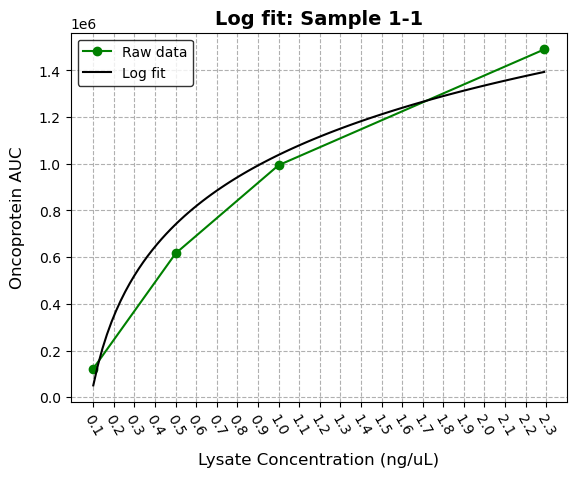

In [22]:
x = df_1_2.Concentration
y = df_1_2.oncoprotein_area

t = np.log(x)
p = np.polyfit(t, y, 1)
a = p[0]
b = p[1]
x_fitted = np.linspace(np.min(x), np.max(x), 100)
y_fitted = a * np.log(x_fitted) + b

ax = plt.axes()
ax.plot(x, y, marker='o', label='Raw data', color='g')
# Title
ax.set_title('Log fit: Sample 1-1', fontweight="bold", fontsize=14)
# x-axis label
ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=12, labelpad=10) # labelpad sets distance of axis label from tick labels
# y-axis label
ax.set_ylabel('Oncoprotein AUC', fontsize=12, labelpad=10)
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1), rotation=-60)
ax.grid(linestyle='--')

# Log fit of degree 1
ax.plot(x_fitted, y_fitted, 'k', label='Log fit')
plt.legend()
# Legend location and font size
legend = ax.legend(loc='upper left', fontsize=10)
# Legend border & border color
legend.get_frame().set_edgecolor('black')
# Legend border width
legend.get_frame().set_linewidth(1)